In [119]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import sklearn 
import plotly.express as px
from urllib.request import urlretrieve 

In [120]:
medical_df = pd.read_csv('/home/juto/Desktop/ML_libraries/scikit-learn/data/medical-charges.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [121]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [122]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [123]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [124]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [125]:
fig = px.histogram(medical_df, x='age', 
                   marginal= 'box',
                   nbins=47,
                    title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [126]:
fig = px.histogram(medical_df, 
                   x='bmi',
                   marginal= 'box',
                   color_discrete_sequence=['red'],
                    title='Distribution of BMI(Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

In [127]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal= 'box',
                   color='region',
                   color_discrete_sequence=['blue', 'red', 'green', 'gray'],
                    title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [128]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [129]:
fig = px.histogram(medical_df, x='smoker',
                   color = 'sex',
                   marginal= 'box',
                    title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [130]:
fig = px.scatter(medical_df, 
                   x='age',
                   y='charges', 
                   color='smoker',
                   opacity=0.8,
                   hover_data=['sex'],
                    title='Age vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [131]:
fig = px.scatter(medical_df,
                x= 'bmi',
                y='charges',
                color='smoker',
                opacity=0.8,
                hover_data=['sex'],
                title='BMI vs Charges')

fig.update_traces(marker_size=5)
fig.show()

In [132]:
px.violin(medical_df, x='children', y='charges')

## Correlation

In [133]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

In [134]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362895)

In [135]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)


np.float64(0.787251430498478)

In [136]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Text(0.5, 1.0, 'Correlation Matrix')

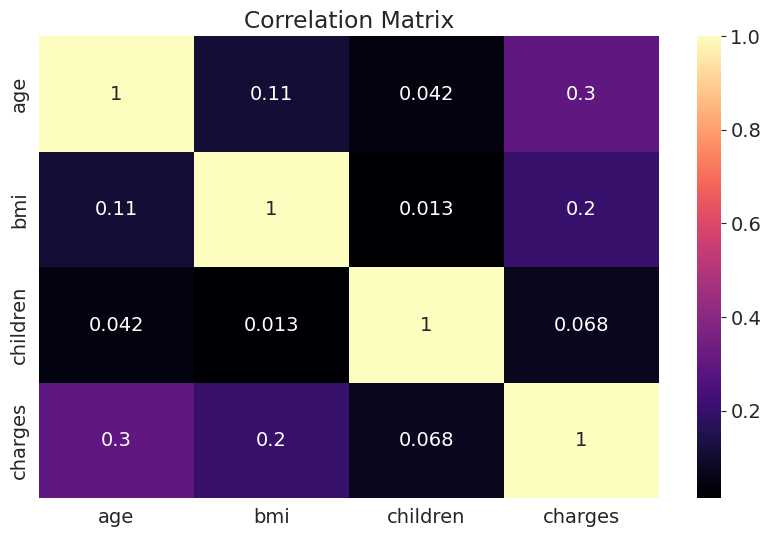

In [137]:
sns.heatmap(medical_df.corr(numeric_only='int', method='pearson'), cmap='magma', annot=True)
plt.title('Correlation Matrix')

## Linear Regressioin using a Single Feature

In [138]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

<Axes: title={'center': 'Age vs Charges'}, xlabel='age', ylabel='charges'>

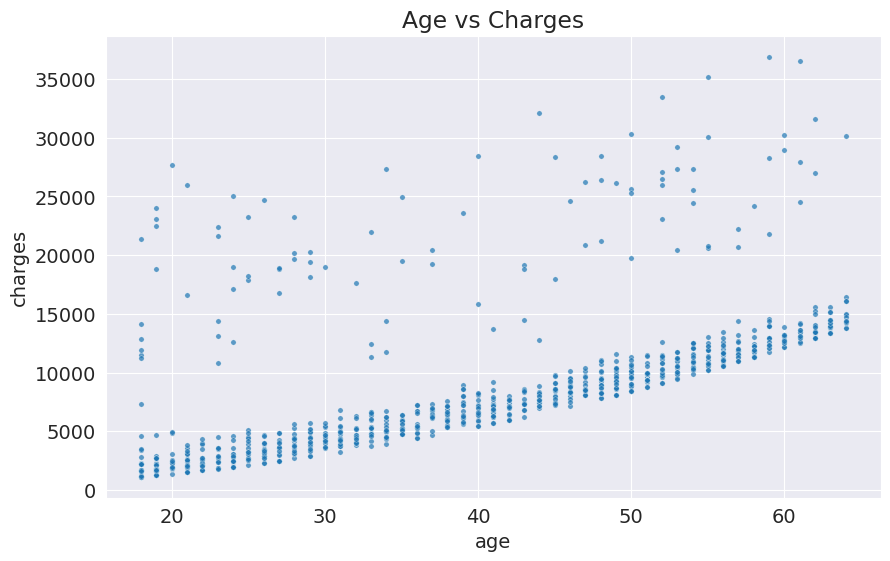

In [139]:
plt.title('Age vs Charges')
sns.scatterplot(non_smoker_df, x='age', y='charges', alpha=0.7, s=15    )

## Modelling

In [140]:
"""
this is our first machine learning model
m=linear regression modelling
"""
def estimate_charges(age, w, b):
    return w * age + b

In [141]:
w = 50
b =100

In [142]:
estimate_charges(40, w, b)

2100

In [143]:
ages = non_smoker_df.age
ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [144]:
estimated_charges = estimate_charges(ages, w, b)
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [145]:
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

Text(0, 0.5, 'Estimated Chrges')

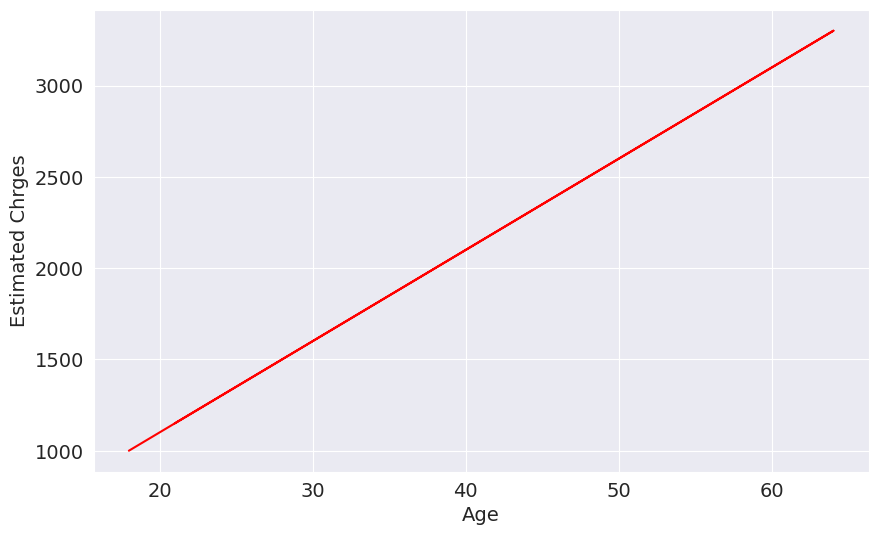

In [146]:
plt.plot(ages, estimated_charges, 'r-')
plt.xlabel('Age')
plt.ylabel('Estimated Chrges')

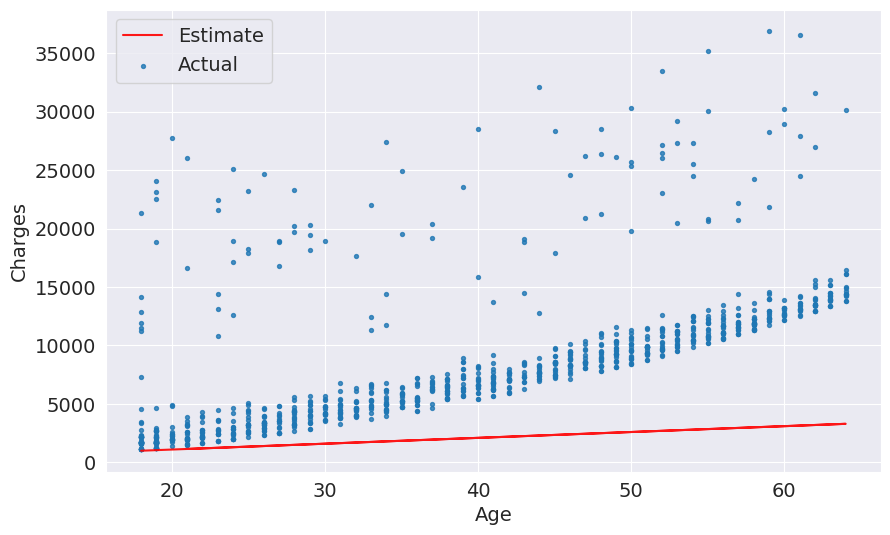

In [147]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9)
plt.scatter(ages,target, s=8, alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual'])
plt.show()

In [148]:
def try_parameters(w,b):
    ages = non_smoker_df.age
    target= non_smoker_df.charges
    
    estimated_charges= estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8, alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])
plt.show()

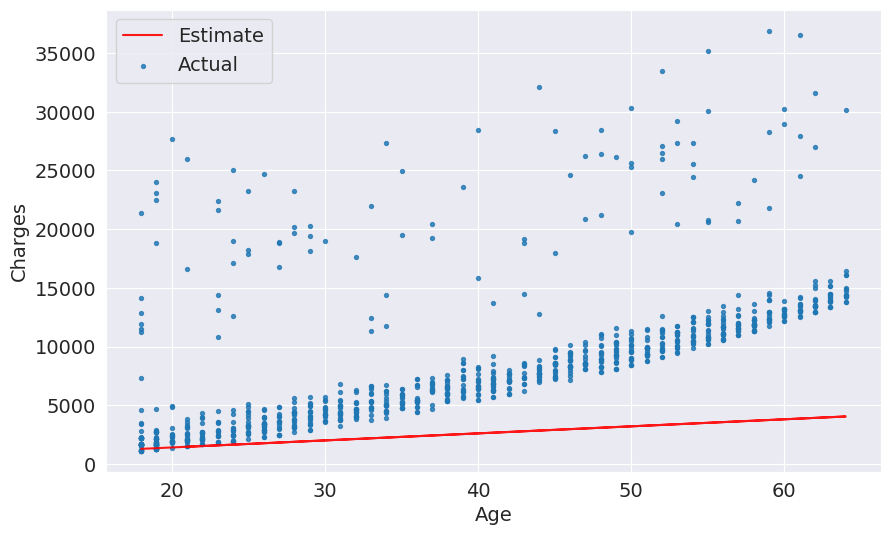

In [149]:
try_parameters(60, 200)

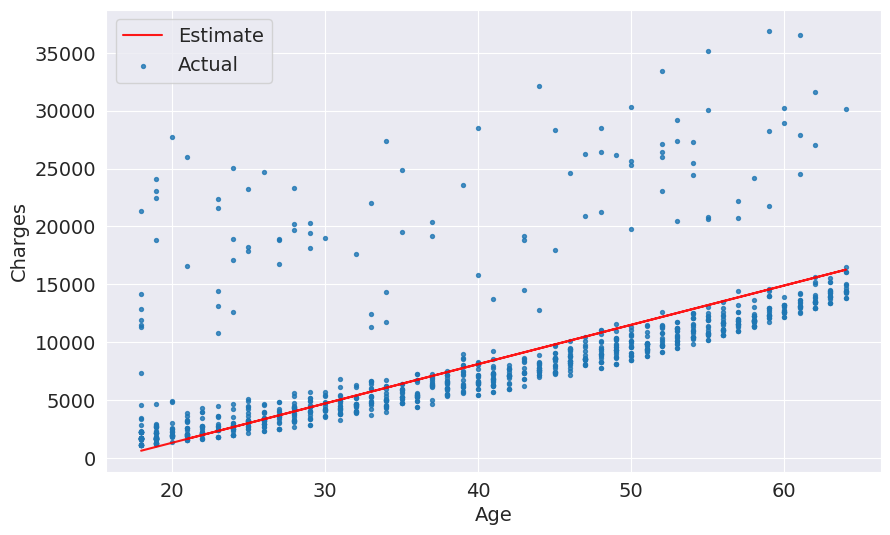

In [150]:
try_parameters(340, -5500)

In [151]:
def rmse(targets, predictions):
    return np.sqrt(np.mean{np.sqr(targets - [predictions])})

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3029274235.py, line 2)